In [1]:
import pandas as pd 

In [2]:
file_path = '../data/healthmonitoring.csv'

health_data = pd.read_csv(file_path)

In [3]:
print(health_data.head())

   PatientID  Age  Gender  HeartRate BloodPressure  RespiratoryRate  \
0          1   69    Male  60.993428        130/85               15   
1          2   32    Male  98.723471        120/80               23   
2          3   78  Female  82.295377        130/85               13   
3          4   38  Female  80.000000        111/78               19   
4          5   41    Male  87.531693        120/80               14   

   BodyTemperature ActivityLevel  OxygenSaturation SleepQuality StressLevel  \
0        98.885236       resting              95.0    excellent         low   
1        98.281883       walking              97.0         good        high   
2        98.820286       resting              98.0         fair        high   
3        98.412594       running              98.0         poor    moderate   
4        99.369871       resting              98.0         good         low   

                    Timestamp  
0  2024-04-26 17:28:55.286711  
1  2024-04-26 17:23:55.286722  
2 

Check whether data contains has any null values or not

In [4]:
health_data.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

In [5]:
# Calculate medians
median_body_temperature = health_data['BodyTemperature'].median()
median_oxygen_saturation = health_data['OxygenSaturation'].median()

In [6]:
# Fill missing values
health_data['BodyTemperature'].fillna(median_body_temperature, inplace=True)
health_data['OxygenSaturation'].fillna(median_oxygen_saturation, inplace=True)

C:\Users\manua\AppData\Local\Temp\ipykernel_28508\728516588.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  health_data['BodyTemperature'].fillna(median_body_temperature, inplace=True)
C:\Users\manua\AppData\Local\Temp\ipykernel_28508\728516588.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [7]:
health_data.isnull().sum()

PatientID           0
Age                 0
Gender              0
HeartRate           0
BloodPressure       0
RespiratoryRate     0
BodyTemperature     0
ActivityLevel       0
OxygenSaturation    0
SleepQuality        0
StressLevel         0
Timestamp           0
dtype: int64

Examine statistics and the distribution of the health metrics (Age, Heart Rate, Respiratory Rate, Body Temperature, and Oxygen Saturation)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
sns.set_theme(style="whitegrid")

In [10]:
health_data.shape

(500, 12)

In [11]:
health_data.describe()

,PatientID,Age,HeartRate,RespiratoryRate,BodyTemperature,OxygenSaturation
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,51.146000,80.131613,17.524000,98.584383,96.296000
std,144.481833,19.821566,9.606273,3.382352,0.461502,1.408671
min,1.000000,18.000000,60.169259,12.000000,97.094895,94.000000
25%,125.750000,34.000000,75.000000,15.000000,98.281793,96.000000
50%,250.500000,51.000000,80.000000,17.500000,98.609167,96.000000
75%,375.250000,69.000000,86.276413,20.000000,98.930497,97.000000
max,500.000000,84.000000,99.925508,23.000000,99.489150,99.000000


In [12]:
# Summary Statistics
summary_stats = health_data.describe()

In [13]:
print(summary_stats)

        PatientID         Age   HeartRate  RespiratoryRate  BodyTemperature  \
count  500.000000  500.000000  500.000000       500.000000       500.000000   
mean   250.500000   51.146000   80.131613        17.524000        98.584383   
std    144.481833   19.821566    9.606273         3.382352         0.461502   
min      1.000000   18.000000   60.169259        12.000000        97.094895   
25%    125.750000   34.000000   75.000000        15.000000        98.281793   
50%    250.500000   51.000000   80.000000        17.500000        98.609167   
75%    375.250000   69.000000   86.276413        20.000000        98.930497   
max    500.000000   84.000000   99.925508        23.000000        99.489150   

       OxygenSaturation  
count        500.000000  
mean          96.296000  
std            1.408671  
min           94.000000  
25%           96.000000  
50%           96.000000  
75%           97.000000  
max           99.000000  


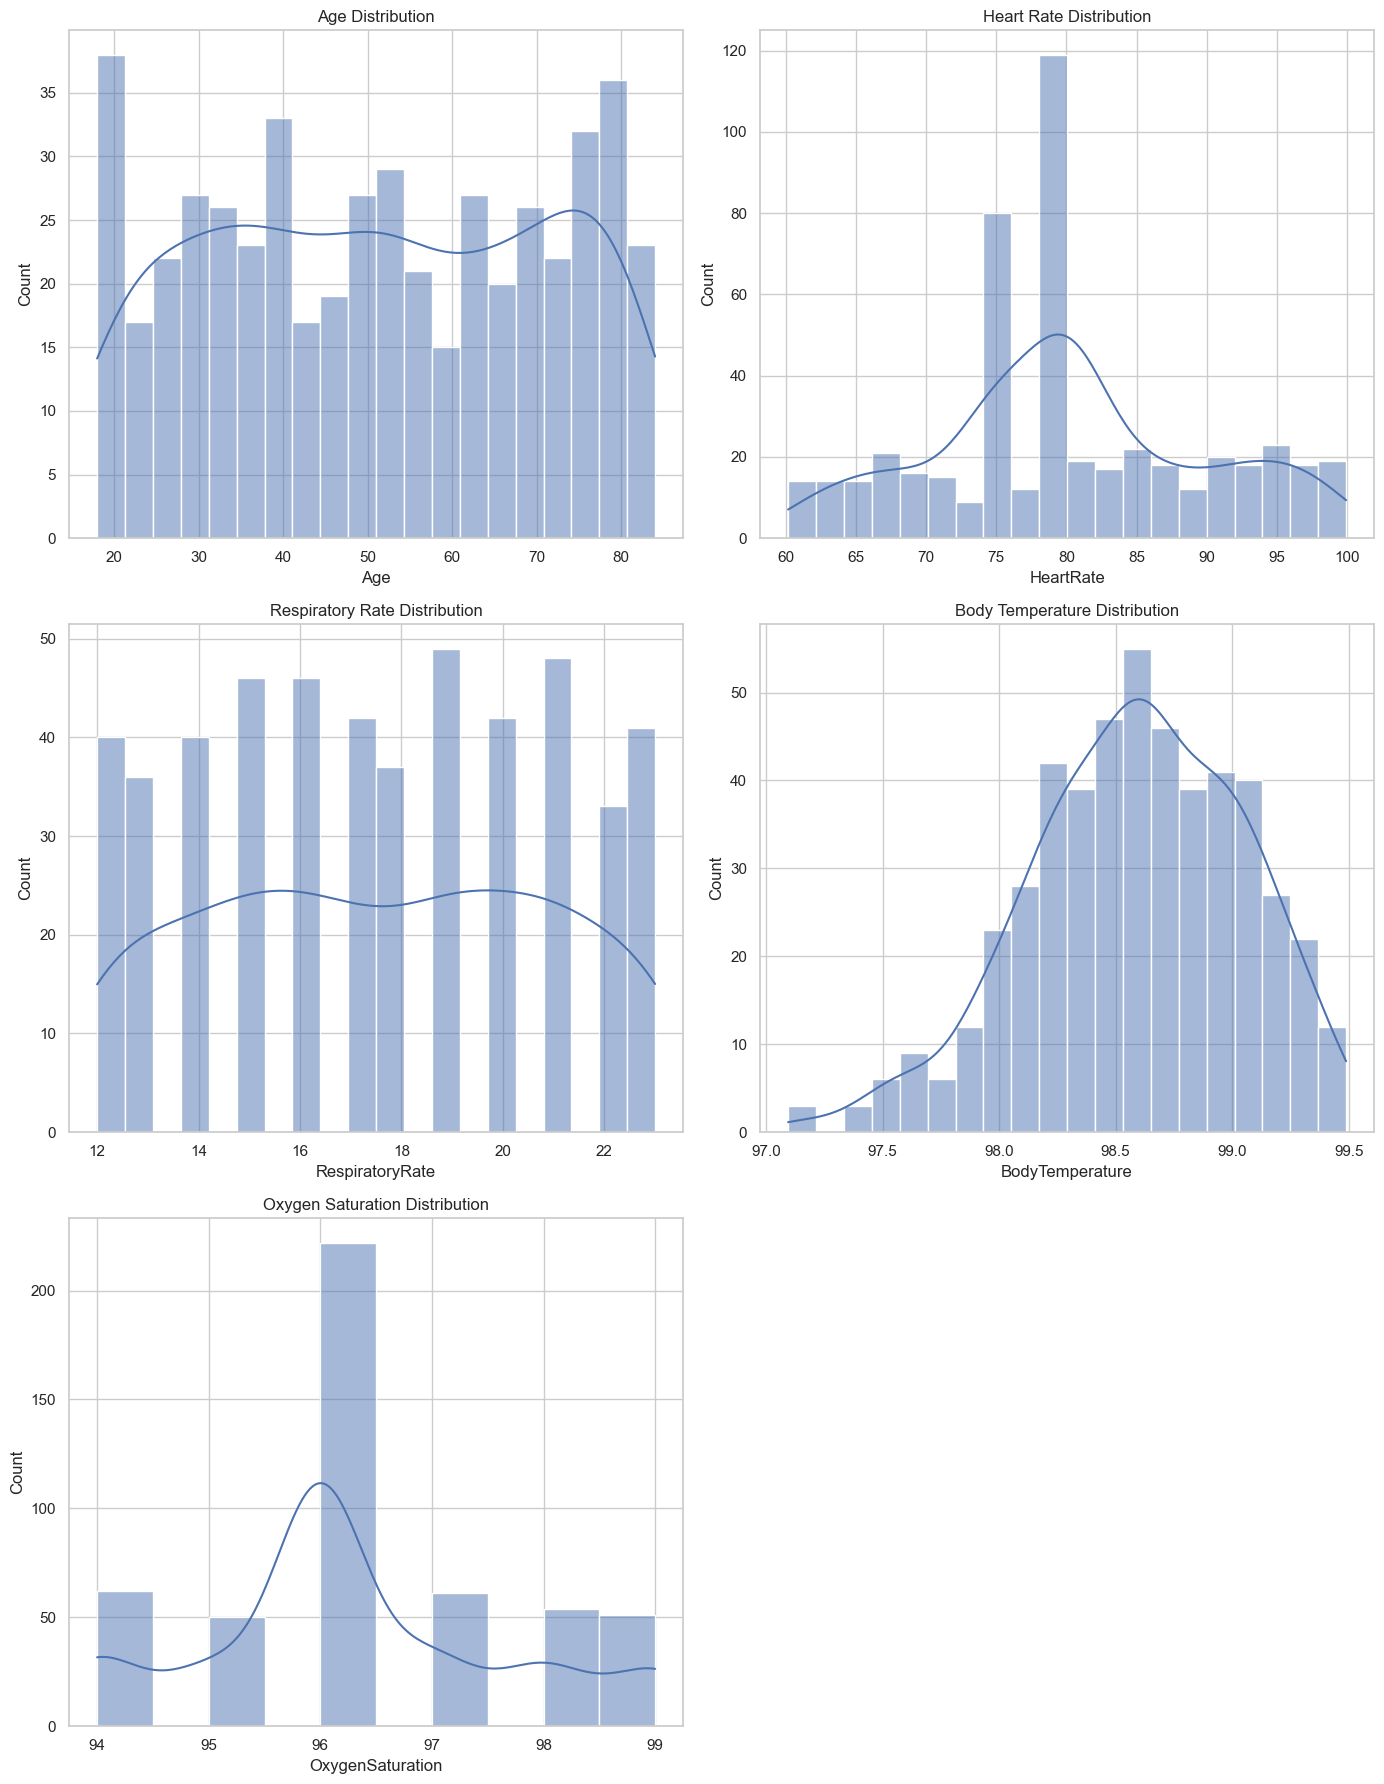

In [14]:
# Plotting the distributions of numerical features
fig, axes = plt.subplots(3, 2, figsize=(14, 18))
    # fig - figure object
    # axes - array of Axes objects corresponding to the subplots

# Age Distribution
sns.histplot(health_data['Age'], bins=20, kde=True, ax=axes[0,0])
axes[0,0].set_title('Age Distribution')

# Heart Rate Distribution
sns.histplot(health_data['HeartRate'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Heart Rate Distribution')

# Respiratory Rate Distribution
sns.histplot(health_data['RespiratoryRate'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Respiratory Rate Distribution')

# Body Temperature Distribution
sns.histplot(health_data['BodyTemperature'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Body Temperature Distribution')

# Oxygen Saturation Distribution
sns.histplot(health_data['OxygenSaturation'], bins=10, kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Oxygen Saturation Distribution')

fig.delaxes(axes[2,1])  # remove unused subplot

plt.tight_layout()
plt.show()

Gender Distribution

In [15]:
gender_counts = health_data['Gender'].value_counts()

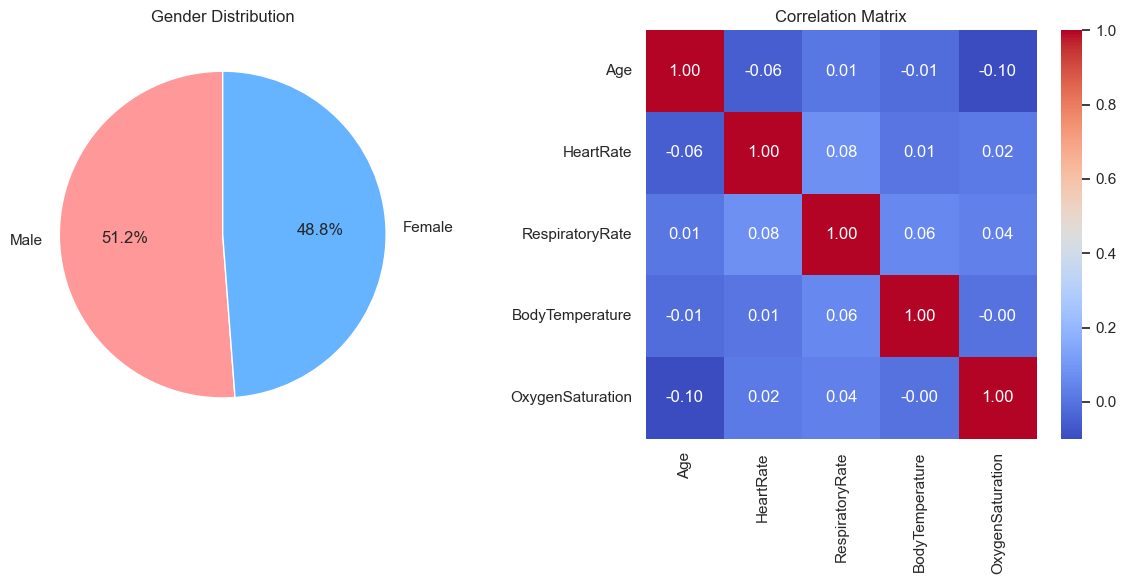

In [16]:
# Calculate the Correlation Matrix for numerical health metrics
correlation_matrix = health_data[['Age', 'HeartRate', 'RespiratoryRate', 'BodyTemperature', 'OxygenSaturation']].corr()

# Plotting the findings
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gender distribution plot
gender_counts.plot(kind='pie', ax=axes[0], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
axes[0].set_ylabel('')
axes[0].set_title('Gender Distribution')

# Correlation Matrix plot
sns.heatmap(correlation_matrix, ax=axes[1], annot=True, fmt=".2f", cmap='coolwarm')
axes[1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

- The pie chart illustrates a nearly equal distribution between male and female subjects in the dataset, with males making up a slightly larger portion at 51.2%. The correlation matrix reveals that there are no strong correlations among the variables, as all the correlation values are close to zero. This indicates that none of the health metrics (Age, Heart Rate, Respiratory Rate, Body Temperature, and Oxygen Saturation) have a significant positive or negative linear relationship with each other in this dataset. In other words, for this group of individuals, variations in one metric are not strongly linked to changes in the others

Heart Rate by Activity Level

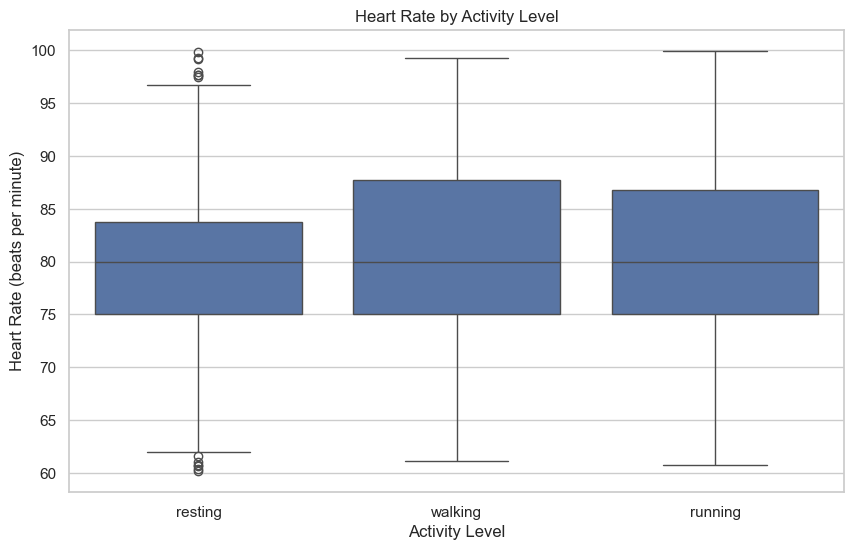

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ActivityLevel', y='HeartRate', data=health_data)
plt.title('Heart Rate by Activity Level')
plt.ylabel('Heart Rate (beats per minute)')
plt.xlabel('Activity Level')
plt.show()

- The data shows that the median heart rate rises from resting to walking, which is expected with increased physical activity. However, it's unusual that the median heart rate does not significantly rise further when running compared to walking, as one would anticipate a higher median heart rate for more intense exercise. Additionally, the interquartile ranges for walking and running significantly overlap, indicating similar variability in heart rates for these activities within the sample population. The outliers in the resting category suggest that some individuals have resting heart rates significantly higher than the typical range for the group.

Distribution of blood pressure levels health metrics by gender

- Systolic blood pressure is the pressure in your arteries when your heart beats and pumps blood. It's the higher number in a blood pressure reading.
- Diastolic blood pressure is the pressure in your arteries when your heart is at rest between beats. It's the lower number in a blood pressure reading.
- For example, in a reading of 120/80 mmHg, 120 is the systolic pressure, and 80 is the diastolic pressure.

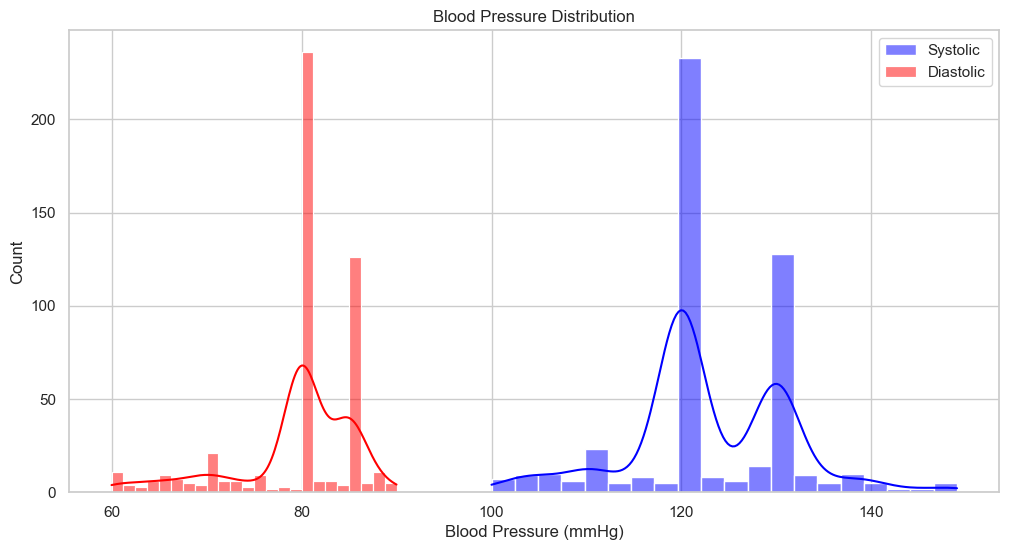

In [18]:
# Extracting systolic and diastolic blood pressure for analysis
health_data[['SystolicBP', 'DiastolicBP']] = health_data['BloodPressure'].str.split('/', expand=True).astype(int)

# Blood pressure distribution
plt.figure(figsize=(12,6))
sns.histplot(health_data['SystolicBP'], color="blue", label="Systolic", kde=True)
sns.histplot(health_data['DiastolicBP'], color="red", label="Diastolic", kde=True)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mmHg)')
plt.legend()
plt.show()


- The systolic blood pressure, shown in blue, has a wider range with notable peaks around 120 mmHg and 140 mmHg. In contrast, the diastolic blood pressure, depicted in red, has a narrower range with a prominent peak around 80 mmHg. This broader spread of systolic values is typical, as systolic pressure is more influenced by factors like activity and stress. This distribution aligns with general population trends, where a systolic reading around 120 mmHg and a diastolic reading around 80 mmHg are considered normal.

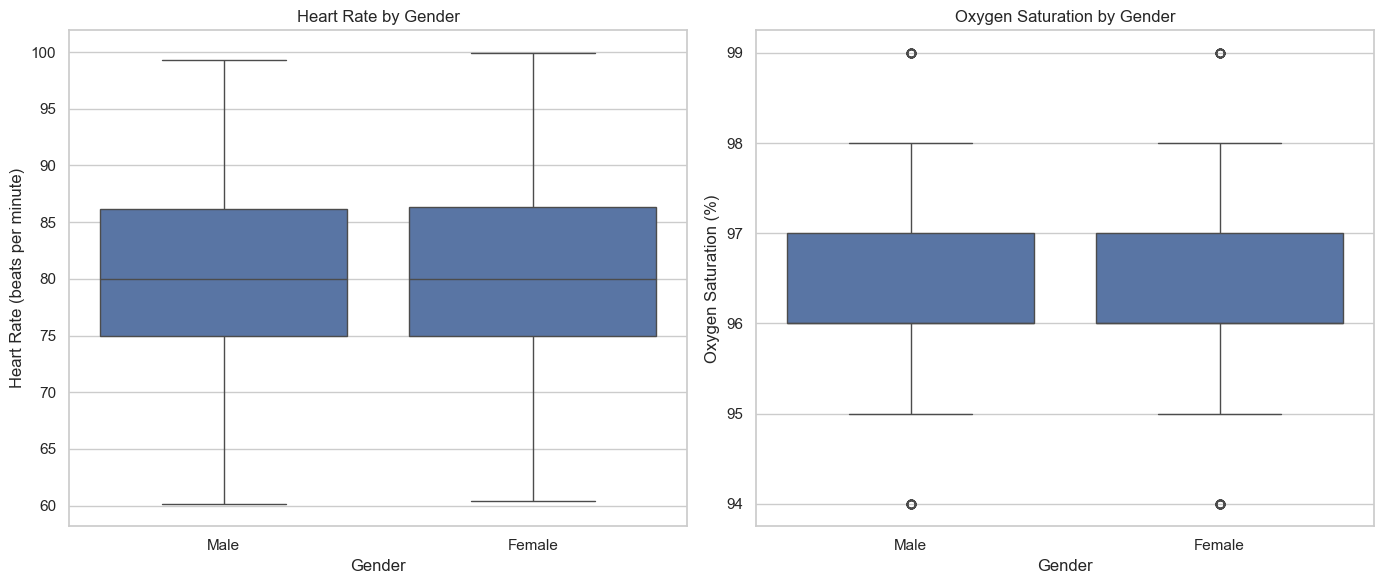

In [21]:
# Health Metrics by Gender
fig, axes = plt.subplots(1, 2, figsize=(14,6))
sns.boxplot(x='Gender', y='HeartRate', data=health_data, ax=axes[0])
axes[0].set_title('Heart Rate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Heart Rate (beats per minute)')

sns.boxplot(x='Gender', y='OxygenSaturation', data=health_data, ax=axes[1])
axes[1].set_title('Oxygen Saturation by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

- For heart rate, males and females exhibit similar median values and interquartile ranges, indicating no significant gender differences in heart rate within this dataset. Similarly, for oxygen saturation, both genders show nearly identical medians and interquartile ranges, suggesting no notable difference between males and females in this sample. Although there are a few outliers with lower oxygen saturation values in both genders, these do not significantly impact the overall distribution.

Heart Rate and Oxygen Saturation by Sleep Quality and Stress Levels

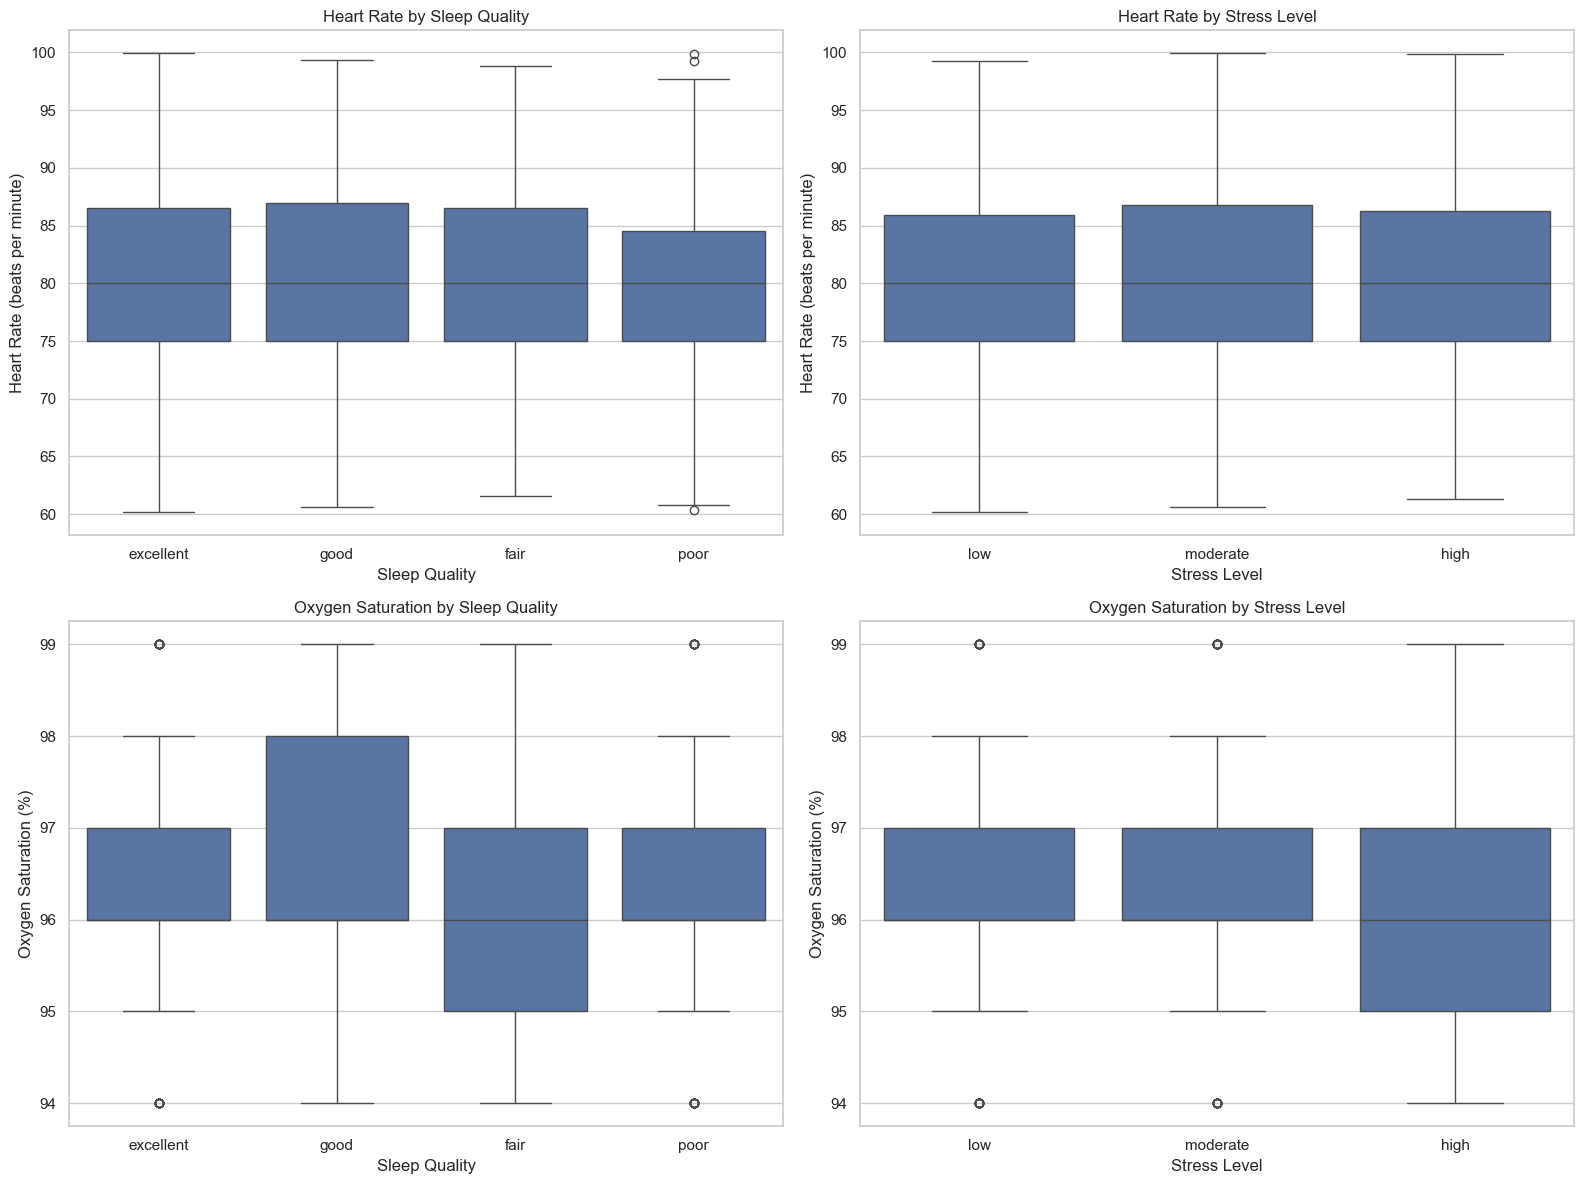

In [25]:
# Categorize sleep quality and stress level for better analysis
sleep_quality_order = ['excellent', 'good', 'fair', 'poor']
stress_level_order = ['low', 'moderate', 'high']

# Creating plots to examine relationships
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# heart rate by sleep quality
sns.boxplot(x='SleepQuality', y='HeartRate', data=health_data, order=sleep_quality_order, ax=axes[0, 0])
axes[0, 0].set_title('Heart Rate by Sleep Quality')
axes[0, 0].set_xlabel('Sleep Quality')
axes[0, 0].set_ylabel('Heart Rate (beats per minute)')

# heart rate by stress level
sns.boxplot(x='StressLevel', y='HeartRate', data=health_data, order=stress_level_order, ax=axes[0, 1])
axes[0, 1].set_title('Heart Rate by Stress Level')
axes[0, 1].set_xlabel('Stress Level')
axes[0, 1].set_ylabel('Heart Rate (beats per minute)')

# oxygen saturation by sleep quality
sns.boxplot(x='SleepQuality', y='OxygenSaturation', data=health_data, order=sleep_quality_order, ax=axes[1, 0])
axes[1, 0].set_title('Oxygen Saturation by Sleep Quality')
axes[1, 0].set_xlabel('Sleep Quality')
axes[1, 0].set_ylabel('Oxygen Saturation (%)')

# oxygen saturation by stress level
sns.boxplot(x='StressLevel', y='OxygenSaturation', data=health_data, order=stress_level_order, ax=axes[1, 1])
axes[1, 1].set_title('Oxygen Saturation by Stress Level')
axes[1, 1].set_xlabel('Stress Level')
axes[1, 1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

- Heart rate remains fairly consistent across various sleep quality and stress levels, though there is slightly more variation for individuals reporting poor sleep. Oxygen saturation shows a slight decline in median values from excellent to poor sleep quality, with some outliers indicating lower saturation even among those with excellent and good sleep. In relation to stress levels, oxygen saturation remains mostly stable. Overall, despite the presence of outliers, the central trends indicate that neither heart rate nor oxygen saturation is significantly impacted by sleep quality or stress levels in this dataset

Respiratory rate and body Temperature by activity levels

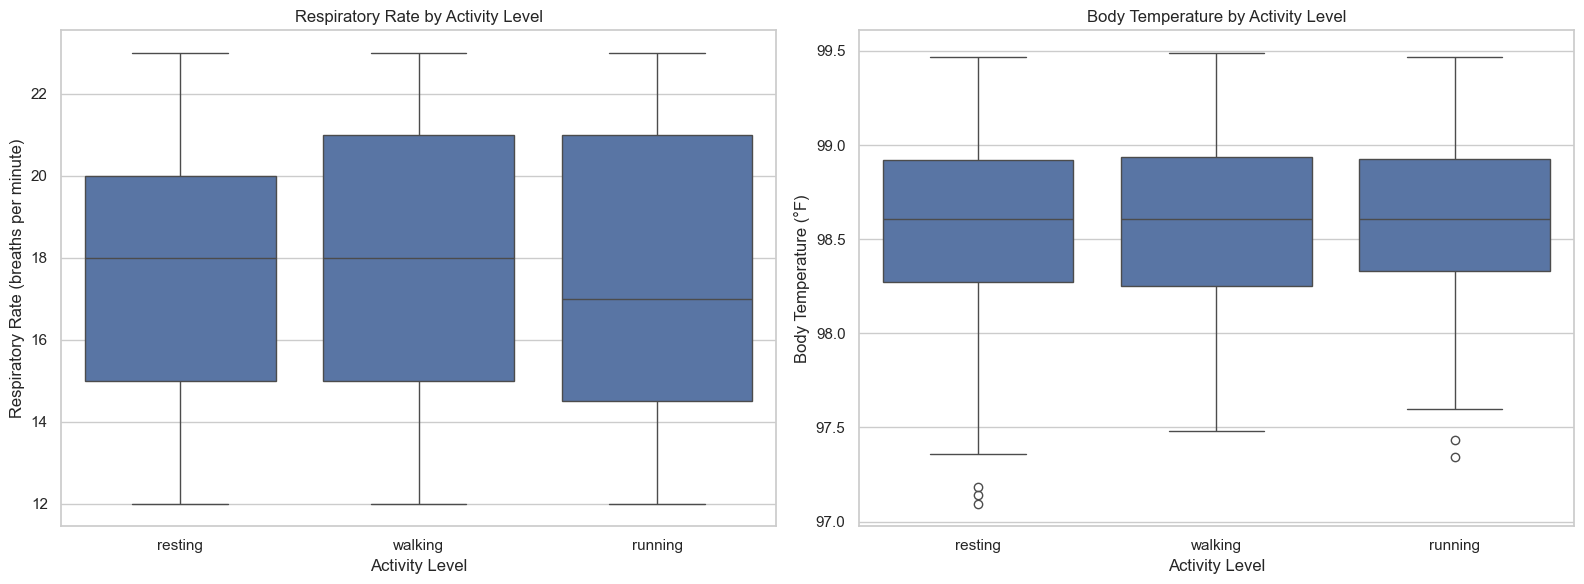

In [26]:
# Creating plots to examine relationships between activity level and other health metrics
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Respiratory rate by activity level
sns.boxplot(x='ActivityLevel', y='RespiratoryRate', data=health_data, ax=axes[0])
axes[0].set_title('Respiratory Rate by Activity Level')
axes[0].set_xlabel('Activity Level')
axes[0].set_ylabel('Respiratory Rate (breaths per minute)')

# Body temperature by activity level
sns.boxplot(x='ActivityLevel', y='BodyTemperature', data=health_data, ax=axes[1])
axes[1].set_title('Body Temperature by Activity Level')
axes[1].set_xlabel('Activity Level')
axes[1].set_ylabel('Body Temperature (°F)')

plt.tight_layout()
plt.show()

- The respiratory rate increases with activity level, shown by higher median rates for walking and running compared to resting. This aligns with physiological responses to exercise, where breathing rates rise to meet oxygen demands. Body temperature also shows a slight upward trend from resting to running, consistent with the body heating up during physical exertion. There are outliers in body temperature at both the resting and running levels, indicating that some individuals have temperatures outside the typical range for these activities. Overall, the observed trends align with expected physiological responses to different activity levels.

Grouping Patients

- Age Group: Young, Middle-aged, Senior
- Blood Pressure Category: Normal, Elevated, Hypertension Stage 1, Hypertension Stage 2, Hypertensive Crisis
- Heart Rate Category: Low(Bradycardia), Normal, High(Tachycardia)
- Oxygen Saturation Category: Normal, Low

In [32]:
# Function that categorizes age into Young' (35 and under), 'Middle-aged' (36 to 55), and 'Senior' (over 55)
def age_group(age):
    if age <= 35:
        return 'Young'
    elif age <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'

# Function that categorize Blood Pressure into 'Normal', 'Elevated', 'Hypertension Stage 1', and 'Hypertension Stage 2', based on systolic and diastolic readings
def blood_pressure_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Elevated'
    elif 140 <= systolic < 160 or 90 <= diastolic < 100:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'

# Function that categorizes Heart Rate into 'Low' (less than 60 bpm), 'Normal' (60-100 bpm), and 'High' (greater than 100 bpm)
def heart_rate_category(hr):
    if hr < 60:
        return 'Low'
    elif hr <= 100:
        return 'Normal'
    else:
        return 'High'

# Function that categorizes Oxygen Saturation into 'Low' (less than 94%) and 'Normal' (94% and above)
def oxygen_category(oxy):
    if oxy < 94:
        return 'Low'
    else:
        return 'Normal'

# Applying categorizations
health_data['Age Group'] = health_data['Age'].apply(age_group)
health_data['Blood Pressure Category'] = health_data.apply(lambda x: blood_pressure_category(x['SystolicBP'], x['DiastolicBP']), axis=1)
health_data['Heart Rate Category'] = health_data['HeartRate'].apply(heart_rate_category)
health_data['Oxygen Category'] = health_data['OxygenSaturation'].apply(oxygen_category)

health_data[['Age', 'AgeGroup', 'SystolicBP', 'DiastolicBP', 'BPCategory', 'HeartRate', 'HRCategory', 'OxygenSaturation', 'OxyCategory']].head()

,Age,AgeGroup,SystolicBP,DiastolicBP,BPCategory,HeartRate,HRCategory,OxygenSaturation,OxyCategory
0,69,Senior,130,85,Elevated,60.993428,Normal,95.0,Normal
1,32,Young,120,80,Elevated,98.723471,Normal,97.0,Normal
2,78,Senior,130,85,Elevated,82.295377,Normal,98.0,Normal
3,38,Middle-aged,111,78,Normal,80.000000,Normal,98.0,Normal
4,41,Middle-aged,120,80,Elevated,87.531693,Normal,98.0,Normal


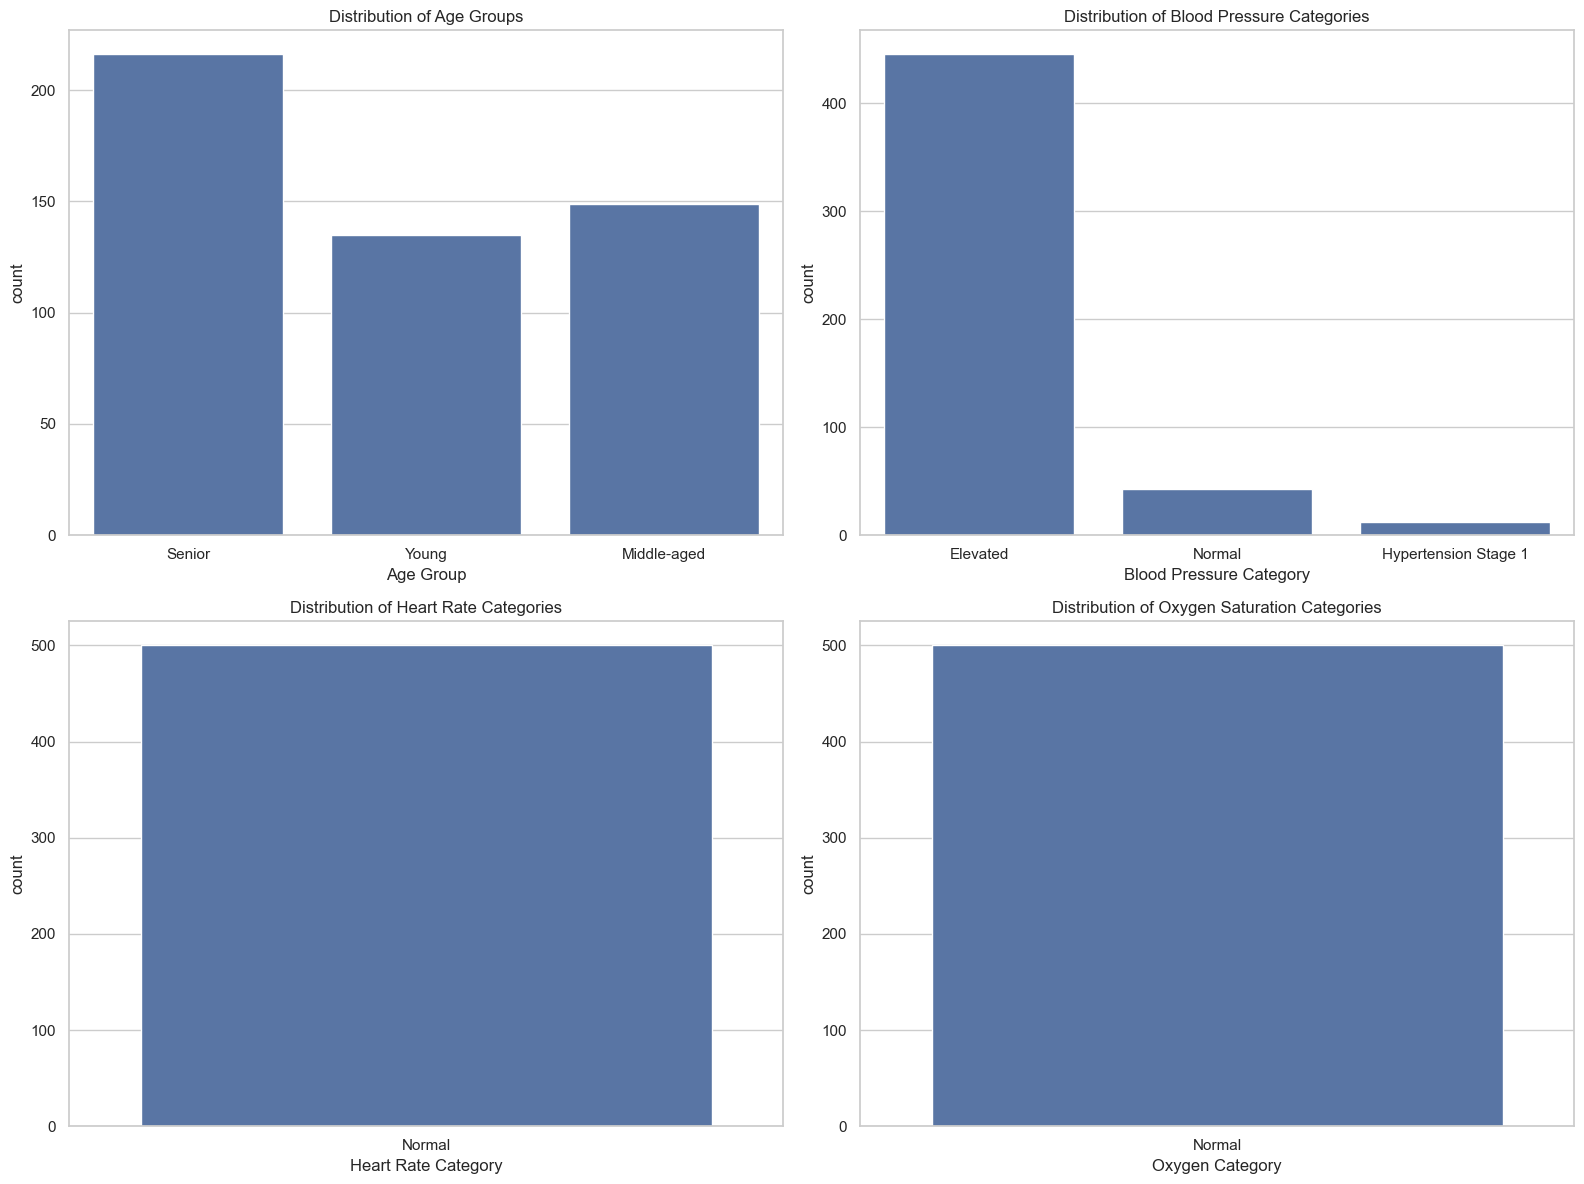

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age Group count plot
sns.countplot(x='Age Group', data=health_data, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age Groups')

# Blood Pressure Category count plot
sns.countplot(x='Blood Pressure Category', data=health_data, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Blood Pressure Categories')

# Heart Rate Category count plot
sns.countplot(x='Heart Rate Category', data=health_data, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Heart Rate Categories')

# Oxygen Saturation Category count plot
sns.countplot(x='Oxygen Category', data=health_data, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Oxygen Saturation Categories')

# Show the plots
plt.tight_layout()
plt.show()

- **Distribution of Age Groups**: The count plot reveals that the 'Senior' category has the highest number of individuals, followed by the 'Middle-aged', then the 'Young' age group. This indicates that seniors make up the largest portion of this dataset.
- **Distribution of Blood Pressure Categories:** Most participants have 'Normal' blood pressure, with fewer cases in the 'Elevated' and 'Hypertension Stage 1' categories. 'Hypertension Stage 2' has the fewest instances, showing that severe hypertension is relatively rare among the participants.
- **Distribution of Heart Rate Categories:** The majority of individuals have a 'Normal' heart rate, with very few categorized as 'Low' or 'High'. This suggests that most people in this dataset have heart rates within the typical range.
- **Distribution of Oxygen Saturation Categories:** Nearly all participants have 'Normal' oxygen saturation levels, with only a few cases of 'Low' saturation. This indicates that oxygen deprivation is uncommon in this group.